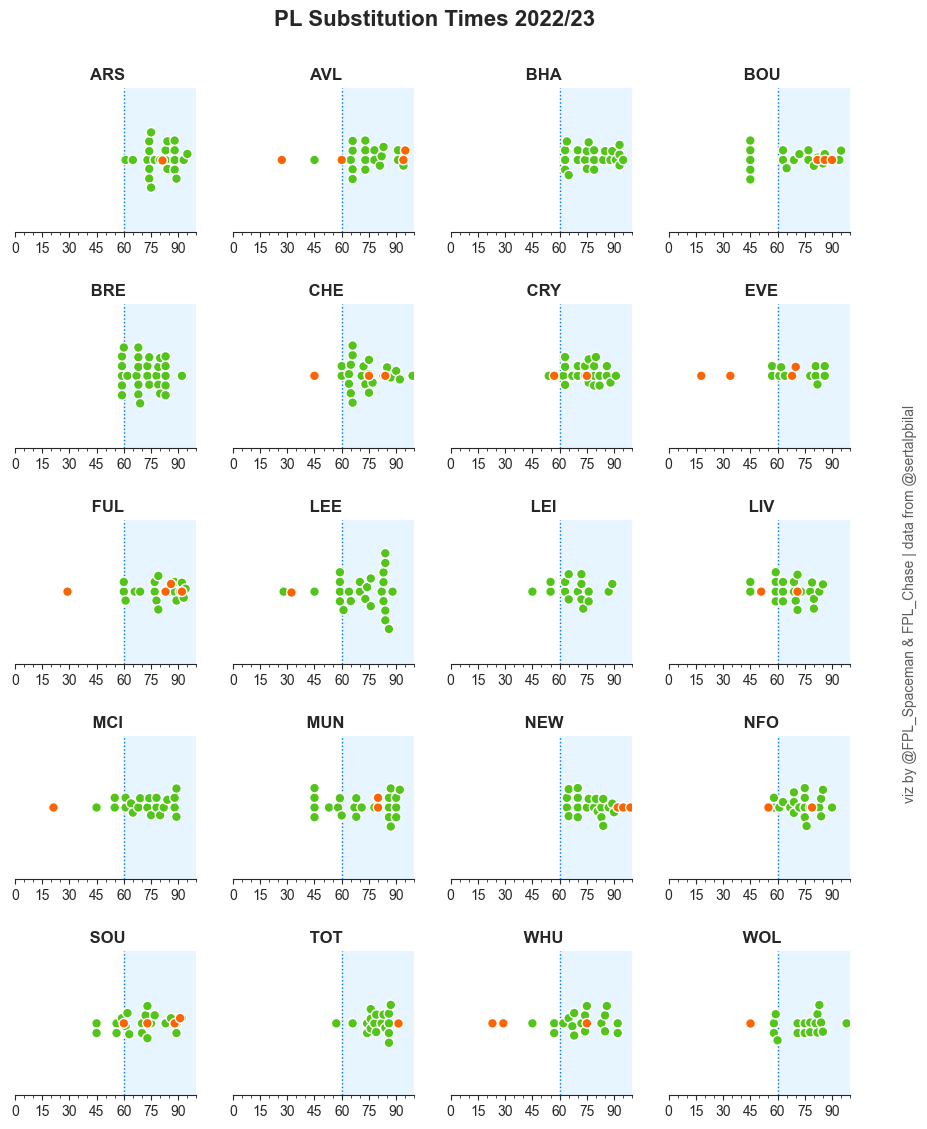

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)


#THIS IS DATAFRAME PART

#columns = ["time_in_seconds", "team_short"]
#df = pd.read_csv("combined.csv", usecols=columns)

df = pd.read_csv('https://raw.githubusercontent.com/sertalpbilal/premier-subs/master/2022-2023/combined.csv')
df['sub_time'] = np.ceil(df['time_in_seconds']/60)
df.sort_values(by='team_short',inplace=True)

#NEW COLUMN FOR INJURY SUB FLAG
def inj_sub(row):
    if 'injury' in row['text']:
        return 'yes'
    else:
        return 'no'

df['injury_sub'] = df.apply(lambda row: inj_sub(row), axis=1)


#LAST GW SUBS IN DATAFRAME
subset=df.loc[df.groupby('team_short')['id'].idxmax()][['kickoff','team_short']]
last_gw = pd.merge(subset, df, on=["kickoff", "team_short"])
last_gw.sort_values(by='team_short',inplace=True)

#THIS IS VIZ PART

#sns.set_style("whitegrid")
sns.set_style('ticks',{"grid.linestyle": ""})

x="sub_time"
y="team_short"


g = sns.FacetGrid(df,col=y,
                  hue='injury_sub',
                  palette=['#52c41a','#fa6402'],
                  sharex=False,
                  sharey=True,
                  col_wrap=4,
                  height=2.2,
                  aspect=1
                 )

g.map_dataframe(sns.swarmplot,
            x=x,
            #color='#016ff8',
            edgecolor='white', 
            linewidth=1,
            size=7)

g.set(xlim=(0, 100),xlabel=None,ylabel=None)

for ax in g.axes.flat:
    ax.get_yaxis().set_visible(False)
    ax.spines['left'].set_color('white')
    ax.xaxis.set_major_locator(MultipleLocator(15))
    ax.xaxis.set_major_formatter('{x:.0f}')
    ax.xaxis.set_minor_locator(MultipleLocator(5))
    ax.axvline(x=60, ymin=0, ymax=1, color='#016ff8', linestyle='dotted', linewidth=1)
    ax.axvspan(60, 100, color='#e6f5ff', alpha=1)
    if ax.get_title():
        ax.set_title(ax.get_title().split('=')[1],
                     fontsize='12', fontweight='bold')

plt.suptitle('PL Substitution Times 2022/23', fontsize=16, fontweight='bold', x=0.5, y=1.04)

plt.figtext(1.04, 0.5, "viz by @FPL_Spaceman & FPL_Chase | data from @sertalpbilal", ha="center", va="center", fontsize=10, color='#5c5c5c', rotation="vertical")

plt.subplots_adjust(hspace=0.5, wspace=0.2)

plt.show()